In [1]:
import PySDM.products as PySDM_products
import numpy as np
from PySDM import Builder
from PySDM import Formulae
from PySDM_examples.Lowe_et_al_2019.constants_def import LOWE_CONSTS

from PySDM_examples.Loftus_and_Wordsworth_2021 import Settings
from PySDM_examples.Loftus_and_Wordsworth_2021.planet import Planet,EarthLike, Earth, EarlyMars, Jupiter, Saturn, K2_18B
from PySDM_examples.Loftus_and_Wordsworth_2021.parcel import AlienParcel
from PySDM_examples.Loftus_and_Wordsworth_2021 import Simulation
import matplotlib.pyplot as plt

In [2]:
from PySDM.physics import terminal_velocity
from PySDM.physics import drop_growth
from PySDM.physics import ventilation
from PySDM.physics.particle_shape_and_density.oblate_spheroid import OblateSpheroid
from PySDM.physics import si


In [3]:
formulaes= Formulae(
    # terminal_velocity="LofusEtAl2021", #eqn 8
    # drop_growth="RogersAndYau1996", #eqn 10
    # particle_shape_and_density="OblateSpheroid",
    ventilation="PruppacherAndRasmussen1979", #drag force/ gravitation eqns
    saturation_vapour_pressure="AugustRocheMagnus",
    diffusion_coordinate="WaterMassLogarithm", #eqn 1
)


In [4]:
new_Earth = EarthLike()
new_Earth.T_STP

300.0

In [5]:
settings = Settings(        
                planet=EarthLike(),
                r_wet= 1e-4*si.m,
                mass_of_dry_air= 1e5*si.kg,
                coord= "WaterMassLogarithm",
                )

0.9999680769614427


In [6]:
# from scipy.optimize import fsolve

# pvs = settings.formulae.saturation_vapour_pressure.pvs_water(settings.T0)
# initial_water_vapour_mixing_ratio = settings.formulae.constants.eps / (settings.p0 / settings.RH0 / pvs - 1
#         )
# def mix(dry,vap,ratio):
#     return (dry + ratio * vap)/(1 + ratio)

# const = settings.formulae.constants
# Rair = mix(const.Rd,const.Rv,initial_water_vapour_mixing_ratio)
# c_p = mix(const.c_pd,const.c_pv,initial_water_vapour_mixing_ratio)

# def f(x):
#     return initial_water_vapour_mixing_ratio/(initial_water_vapour_mixing_ratio+ const.eps)*settings.p0*(x/settings.T0)**(c_p/Rair
#             ) - settings.formulae.saturation_vapour_pressure.pvs_water(x)
        
# tdews = (fsolve(f, [150,300]))
# Tcloud = np.max(tdews)
# Zcloud = (settings.T0-settings.Tcloud)*c_p/settings.formulae.constants.g_std
# thstd =settings.formulae.trivia.th_std(settings.p0, settings.T0)

# pcloud = settings.formulae.hydrostatics.p_of_z_assuming_const_th_and_initial_water_vapour_mixing_ratio(settings.p0, 
#         thstd, settings.initial_water_vapour_mixing_ratio, settings.Zcloud)
# print(Tcloud, Zcloud, pcloud)
# print(settings.RH0)

0.9999444893251528


/Users/emmaware/PySDM/examples/PySDM_examples/Loftus_and_Wordsworth_2021/settings.py:53: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  tdews = (fsolve(f, [150,300]))
/Users/emmaware/PySDM/PySDM/backends/numba.py:48: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(


348.74625129556915
342.25625129556914
335.7662521076893
329.2762552973796
322.7862624287392
316.2962750645159
309.8062947661054
303.3163187806435
296.8263478874779
290.33638286527827
283.84643778982917
277.35650014067284
270.8665871001094
264.37669201735326
257.8868115658993
251.39694690765174
244.90710485484263
238.41728091601283
231.927482674259
225.4377116733831
218.94796945582993
212.45825756268695
205.96857753368383
199.47893090719225
192.9893192202256
186.49974400843877
180.01020205496297
173.52069470107952
167.0312284210905
160.54179941972401
154.05240903468206
147.56306430998802
141.0737608734989
134.58450614820222
128.0952953782234
121.60613636483201
115.11703062872523
108.62797283970369
102.13896432591729
95.65000641432096
89.16110043067467
82.67225530698794
76.1834725557977
69.69474570287817
63.2060760692111
56.71747333723371
50.22893901404632
43.74047460539127
37.25208161565321
30.76376154785937
24.27551590367993
17.78734618342835
11.299253886061756
4.811240509181237


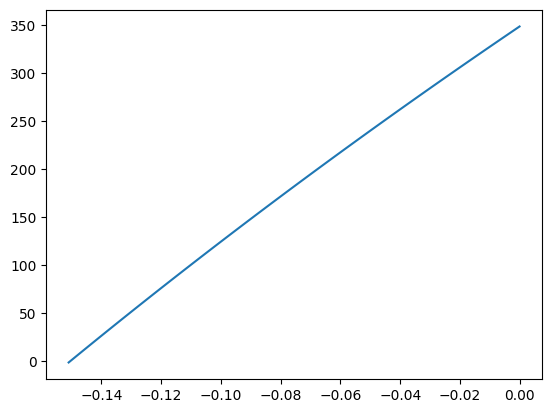

In [7]:
new_Earth = EarthLike()
new_Earth.RH_zref = 0.85
settings = Settings(        
                planet=new_Earth,
                r_wet= 1e-3*si.m,
                mass_of_dry_air= 1e5*si.kg,
                coord= "WaterMassLogarithm",
                )
simulation = Simulation(settings)
output = simulation.run()

plt.plot(output['S'],output['z'])

/Users/emmaware/PySDM/PySDM/backends/numba.py:48: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(


348.74625129556915
342.25625129556914
335.7662521076893
329.2762552973796
322.7862624287392
316.2962750645159
309.8062947661054
303.3163187806435
296.8263478874779
290.33638286527827
283.84643778982917
277.35650014067284
270.8665871001094
264.37669201735326
257.8868115658993
251.39694690765174
244.90710485484263
238.41728091601283
231.927482674259
225.4377116733831
218.94796945582993
212.45825756268695
205.96857753368383
199.47893090719225
192.9893192202256
186.49974400843877
180.01020205496297
173.52069470107952
167.0312284210905
160.54179941972401
154.05240903468206
147.56306430998802
141.0737608734989
134.58450614820222
128.0952953782234
121.60613636483201
115.11703062872523
108.62797283970369
102.13896432591729
95.65000641432096
89.16110043067467
82.67225530698794
76.1834725557977
69.69474570287817
63.2060760692111
56.71747333723371
50.22893901404632
43.74047460539127
37.25208161565321
30.76376154785937
24.27551590367993
17.78734618342835
11.299253886061756
4.811240509181237


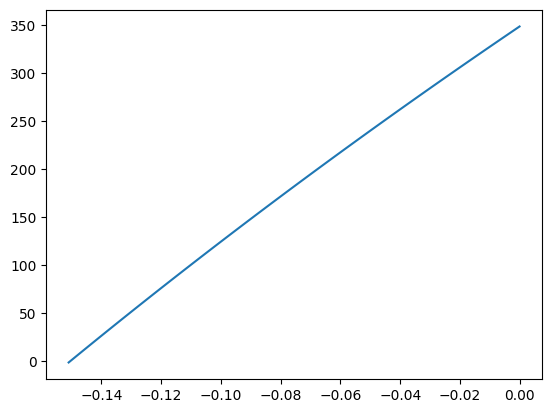

In [8]:
simulation = Simulation(settings)
output = simulation.run()

#output currently has height, RH, radius, and time.. need others?
plt.plot(output['S'],output['z'])


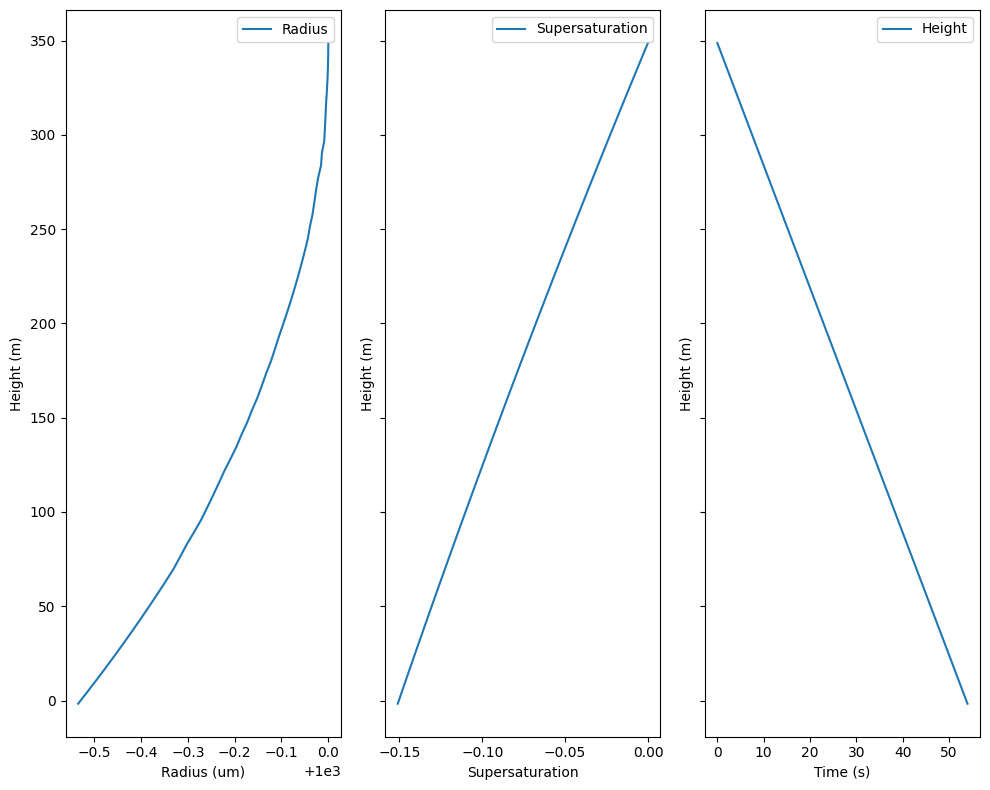

In [9]:
fig,axs = plt.subplots(1, 3, figsize=(10, 8),sharey=True)
axs[0].plot(output["r"], output["z"], label="Radius")
axs[0].set_ylabel("Height (m)")
axs[0].set_xlabel("Radius (um)")
axs[0].legend()
axs[1].plot(output["S"], output["z"], label="Supersaturation")
axs[1].set_xlabel("Supersaturation")
axs[1].set_ylabel("Height (m)")
axs[1].legend()
axs[2].plot(output["t"], output["z"], label="Height")
axs[2].set_ylabel("Height (m)")
axs[2].set_xlabel("Time (s)")
axs[2].legend()
plt.tight_layout()